Best Parameters: {'tree__ccp_alpha': 0.006666666666666666, 'tree__max_depth': 3}
Best CV Score: 0.9474367088607595
Test Accuracy: 0.9239766081871345


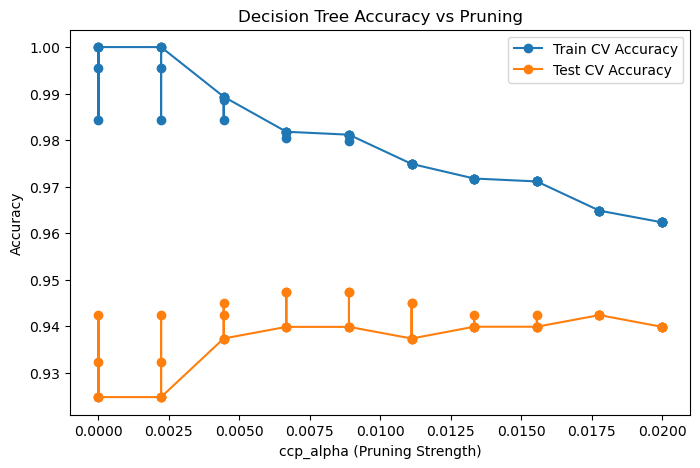

No Pruning - Train Acc: 1.0
No Pruning - Test Acc: 0.9181286549707602
Best Pruning - Train Acc: 0.9798994974874372
Best Pruning - Test Acc: 0.9239766081871345


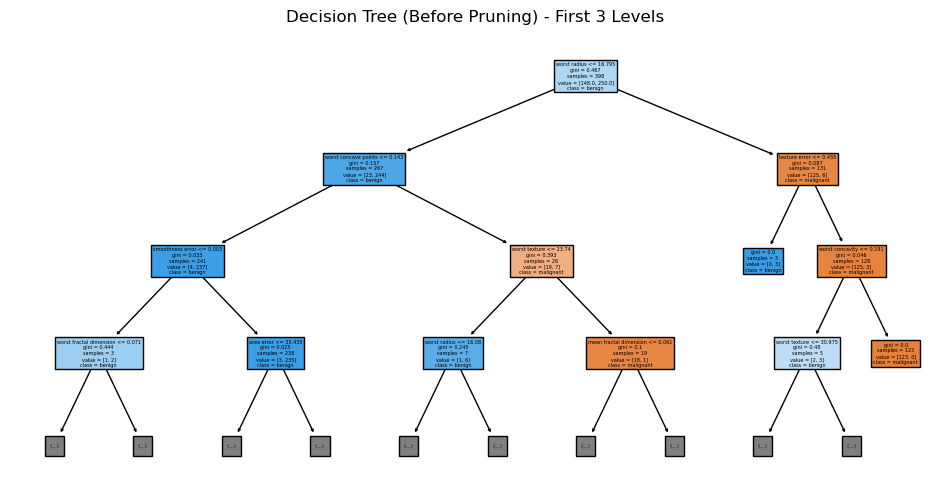

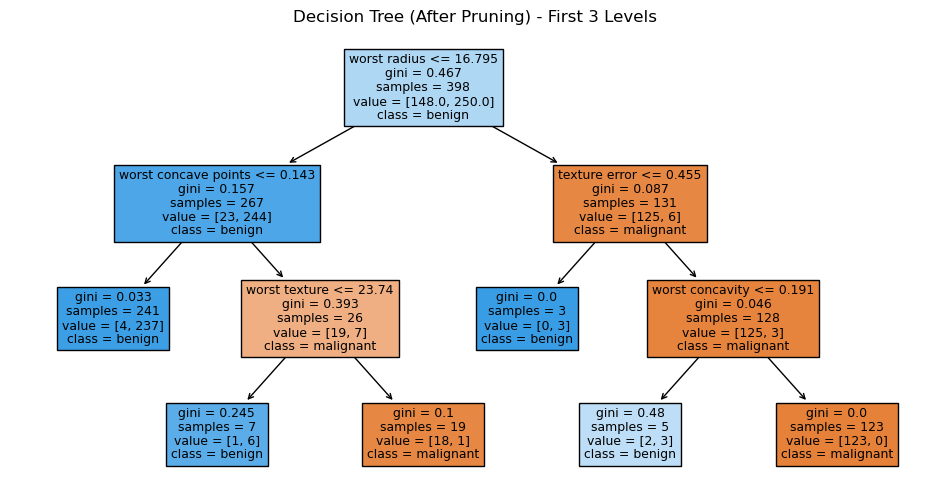

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Build pipeline
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("tree", DecisionTreeClassifier(random_state=42))
])

# Parameter grid: pruning + depth tuning
param_grid = {
    "tree__ccp_alpha": np.linspace(0, 0.02, 10),   # 10 values from 0 to 0.02
    "tree__max_depth": [None, 3, 5, 7, 10]
}

grid = GridSearchCV(pipe, param_grid, cv=5, scoring="accuracy", return_train_score=True)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best CV Score:", grid.best_score_)
print("Test Accuracy:", grid.score(X_test, y_test))


results=grid.cv_results_

mean_train_scores=results["mean_train_score"]
mean_test_scores=results["mean_test_score"]

alphas=results["param_tree__ccp_alpha"].data.astype(float)
plt.figure(figsize=(8,5))
plt.plot(alphas, mean_train_scores, marker="o", label="Train CV Accuracy")
plt.plot(alphas, mean_test_scores, marker="o", label="Test CV Accuracy")
plt.xlabel("ccp_alpha (Pruning Strength)")
plt.ylabel("Accuracy")
plt.title("Decision Tree Accuracy vs Pruning")
plt.legend()
plt.show()

clf_no_prune=DecisionTreeClassifier(random_state=42,ccp_alpha=0.0)
clf_no_prune.fit(X_train,y_train)
print("No Pruning - Train Acc:", clf_no_prune.score(X_train, y_train))
print("No Pruning - Test Acc:", clf_no_prune.score(X_test, y_test))

best_alpha=grid.best_params_["tree__ccp_alpha"]
clf_pruned=DecisionTreeClassifier(random_state=42,ccp_alpha=best_alpha,max_depth=grid.best_params_["tree__max_depth"])
clf_pruned.fit(X_train,y_train)
print("Best Pruning - Train Acc:", clf_pruned.score(X_train, y_train))
print("Best Pruning - Test Acc:", clf_pruned.score(X_test, y_test))

# --- Tree BEFORE pruning ---
plt.figure(figsize=(12,6))
plot_tree(clf_no_prune, filled=True, feature_names=data.feature_names, class_names=data.target_names, max_depth=3)
plt.title("Decision Tree (Before Pruning) - First 3 Levels")
plt.show()

# --- Tree AFTER pruning ---
plt.figure(figsize=(12,6))
plot_tree(clf_pruned, filled=True, feature_names=data.feature_names, class_names=data.target_names, max_depth=3)
plt.title("Decision Tree (After Pruning) - First 3 Levels")
plt.show()